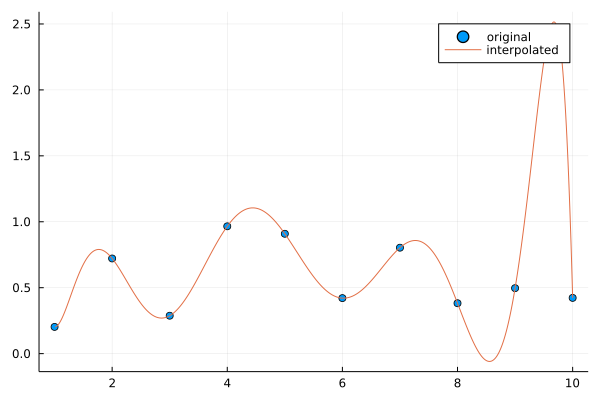

In [1]:
#zadanie 1
using Plots
using Random

function f(xs, ys, x)
    val = 0
    for i in 1:length(xs)
        y = ys[i]
        el = 1
        for x_i in xs
            if xs[i] != x_i
                el = el * (x - x_i)/(xs[i] - x_i)
            end
        end
        val = val + y * el
    end
    return val
end

xs = 1:10
ys = [rand() for x in xs]
interpolated_xs = [1 + 0.01*i for i in 1:900]
interpolated_ys = [f(xs, ys, interpolated_xs[i]) for i in 1:900]
scatter(xs, ys, label = "original")
plot!(interpolated_xs, interpolated_ys, label = "interpolated")

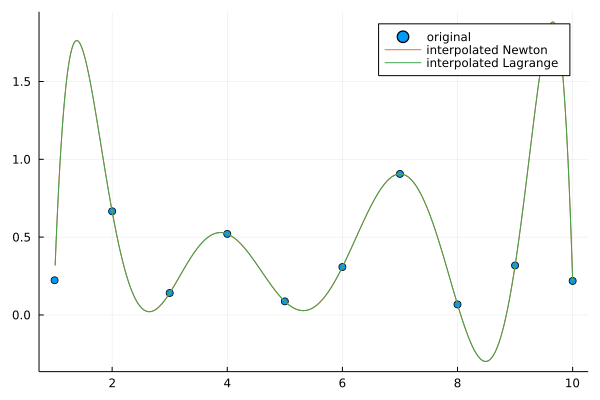

In [2]:
#zadanie 2
using Plots
using Random

function horner(f, xs, x) #f - newt
    n = length(xs)
    el = 1
    sum = f[1]
    for i in 2:n
        el  = el * (x - xs[i - 1])
        sum = sum + f[i] * el
    end
    return sum
end

function f_coefficients(xs, ys) #NewtonInterpolation
    n = length(xs)
    T = zeros(Float32, (n,n))
    for i in 1:n
        T[i,1] = ys[i] 
    end
    for col in 2:n
        for row in 2:(n-col+2)
            T[row-1,col] = (T[row,col-1] - T[row-1,col-1])/(xs[row+col-2] - xs[row-1])
        end
    end
    return [T[1,i] for i in 1:n]
end

xs = 1:10
ys = [0.2228102368960816, 0.6659260478052899, 0.14096482123603793, 0.5207217434755618, 0.08730748719884396, 0.30795592421274187, 0.9060826832026531, 0.06757376372446744, 0.31789037453235314, 0.2185062549341682]
#ys = [rand() for x in xs]
fun = f_coefficients(xs, ys)
interpolated_xs = [1 + 0.01*i for i in 1:900]
interpolated_ys_newt = [horner(fun, xs, interpolated_xs[i]) for i in 1:900]
interpolated_ys_lagrange = [f(xs, ys, interpolated_xs[i]) for i in 1:900]
scatter(xs, ys, label = "original")
#plot!(interpolated_xs, interpolated_ys_lagrange, label = "interpolated Lagrange")
#plot!(interpolated_xs, interpolated_ys_newt, label = "interpolated Newton")
plot!([interpolated_xs interpolated_xs], [interpolated_ys_newt interpolated_ys_newt], label = ["interpolated Newton" "interpolated Lagrange"])

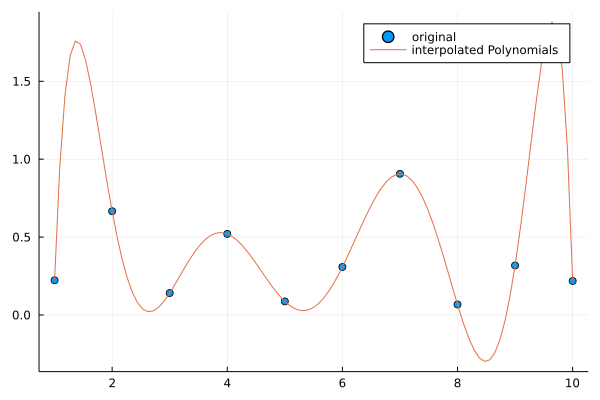

In [3]:
#zadanie 3
using Plots
using Random
using Polynomials

xs = 1:10
ys = [0.2228102368960816, 0.6659260478052899, 0.14096482123603793, 0.5207217434755618, 0.08730748719884396, 0.30795592421274187, 0.9060826832026531, 0.06757376372446744, 0.31789037453235314, 0.2185062549341682]
#ys = [rand() for x in xs]
fun = f_coefficients(xs, ys)
interpolated_xs = [1 + 0.01*i for i in 1:900]
interpolated_ys_newt = [horner(fun, xs, interpolated_xs[i]) for i in 1:900]
interpolated_ys_lagrange = [f(xs, ys, interpolated_xs[i]) for i in 1:900]
scatter(xs, ys, label = "original")
poly = fit(xs, ys)
#plot!(interpolated_xs, interpolated_ys_lagrange, label = "interpolated Lagrange")
#plot!(interpolated_xs, interpolated_ys_newt, label = "interpolated Newton")
plot!(poly, extrema(xs)..., label = "interpolated Polynomials")
#plot!([interpolated_xs interpolated_xs], [interpolated_ys_newt interpolated_ys_newt], label = ["interpolated Newton" "interpolated Lagrange"])


300×3 DataFrame
 Row │ operation    points  time      
     │ Any          Any     Any       
─────┼────────────────────────────────
   1 │ Lagrange     10      0.02205
   2 │ Newton       10      0.123122
   3 │ Polynomials  10      4.37e-5
   4 │ Lagrange     10      0.0010074
   5 │ Newton       10      0.0001627
   6 │ Polynomials  10      8.9e-6
   7 │ Lagrange     10      0.0009752
   8 │ Newton       10      0.0001428
   9 │ Polynomials  10      5.9e-6
  10 │ Lagrange     10      0.0009031
  11 │ Newton       10      0.0001447
  12 │ Polynomials  10      5.6e-6
  13 │ Lagrange     10      0.0008987
  14 │ Newton       10      0.0001426
  15 │ Polynomials  10      5.4e-6
  16 │ Lagrange     10      0.0009158
  17 │ Newton       10      0.0001416
  18 │ Polynomials  10      7.7e-6
  19 │ Lagrange     10      0.0009027
  20 │ Newton       10      0.0001622
  21 │ Polynomials  10      5.9e-6
  22 │ Lagrange     10      0.0008975
  23 │ Newton       10      0.0001422
  24 │ Polynomia

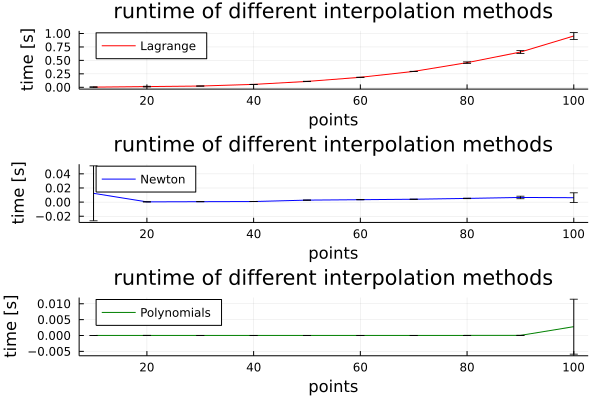

In [30]:
#zadanie 4
using Plots
using Random
using Polynomials
using DataFrames
using Statistics

function measure_lagrange(xs,ys,n,interpolated_xs)
    t = @elapsed [f(test_xs, test_ys, interpolated_xs[i]) for i in 1:(900 + 1000 * Int(n/10))]
    return t
end

function measure_newton(xs,ys,n,interpolated_xs)
    coeffs = f_coefficients(test_xs, test_ys)
    t1 = @elapsed f_coefficients(test_xs, test_ys)
    t2 = @elapsed [horner(coeffs, test_xs, interpolated_xs[i]) for i in 1:(900 + 1000 * Int(n/10))]
    return t1 + t2
end

function measure_polynomials(xs,ys)
    t1 = @elapsed fit(test_xs, test_ys)
    t2 = @elapsed extrema(xs)
    return t1 + t2
end

function get_n(T, n)
    if n < length(T)
        return [T[i] for i in 1:n]
    else
        return [rand() for i in 1:n]
    end
end

xs = 1:100
ys = [rand() for x in xs]
operation, points, time = [], [], []

test_xs = get_n(xs, 10)
test_ys = get_n(ys, 10)
interpolated_xs = [1 + 0.1*i for i in 1:90]
tmp1 = @elapsed [f(test_xs, test_ys, interpolated_xs[i]) for i in 1:90]
tmp2 = @elapsed [horner(f_coefficients(test_xs, test_ys), test_xs, interpolated_xs[i]) for i in 1:90]
tmp3 = @elapsed fit(test_xs, test_ys)
tmp4 = @elapsed extrema(test_xs)

for n in 10:10:100
    test_xs = get_n(xs, n)
    test_ys = get_n(ys, n)
    interpolated_xs = [1 + 0.01*i for i in 1:(900 + 1000 * Int(n/10))]
    for i in 1:10
        push!(time, measure_lagrange(test_xs, test_ys, n, interpolated_xs))
        push!(operation, "Lagrange")
        push!(points, n)
        push!(time, measure_newton(test_xs, test_ys, n, interpolated_xs))
        push!(operation, "Newton")
        push!(points, n)
        push!(time, measure_polynomials(test_xs, test_ys))
        push!(operation, "Polynomials")
        push!(points, n)
    end
end

df = DataFrame(operation = operation, points = points, time = time)
print(df)
df1 = df[df.operation .== "Lagrange", :]
df1 = groupby(df1, [:points])
df1 = combine(df1, "time" => mean, "time" => std)
df2 = df[df.operation .== "Newton", :]
df2 = groupby(df2, [:points])
df2 = combine(df2, "time" => mean, "time" => std)
df3 = df[df.operation .== "Polynomials", :]
df3 = groupby(df3, [:points])
df3 = combine(df3, "time" => mean, "time" => std)
plot([df1.points df2.points df3.points], [df1.time_mean df2.time_mean df3.time_mean],
title = "runtime of different interpolation methods",
xlab = "points", ylab = "time [s]",
label = ["Lagrange" "Newton" "Polynomials"],
yerr = [df1.time_std df2.time_std df3.time_std],
colour = [:red :blue :green],
legend = :topleft,
layout = (3,1))

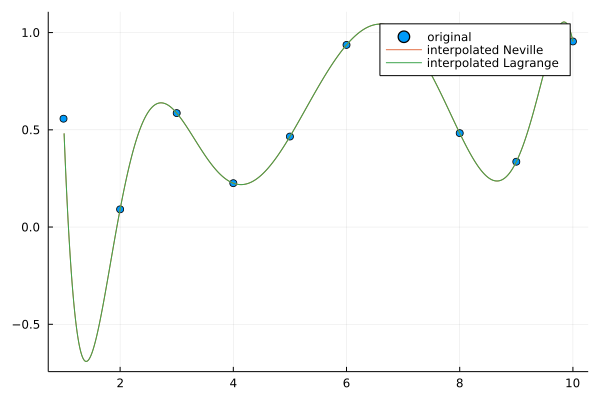

In [4]:
#zadanie 5
using Plots
using Random

function neville(xs, ys, x)
    n = length(xs)
    T = zeros(n,n)
    for x in 1:n
        T[x,1] = ys[x]
    end
    for i in 2:n
        for j in i:n
            T[j,i] = ((x - xs[j-i+1]) * T[j,i-1] - (x - xs[j]) * T[j-1,i-1]) / (xs[j] - xs[j-i+1])
        end
    end
    return T[n,n]
end

xs = 1:10
ys = [rand() for x in xs]

interpolated_xs = [1 + 0.01*i for i in 1:900]
interpolated_ys_neville = [neville(xs, ys, x) for x in interpolated_xs]
interpolated_ys_lagrange = [f(xs, ys, x) for x in interpolated_xs]
scatter(xs, ys, label = "original")
#plot!(interpolated_xs, interpolated_ys_lagrange, label = "interpolated Lagrange")
#plot!(interpolated_xs, interpolated_ys_neville, label = "interpolated Neville")
plot!([interpolated_xs interpolated_xs], [interpolated_ys_neville ], label = ["interpolated Neville" "interpolated Lagrange"])

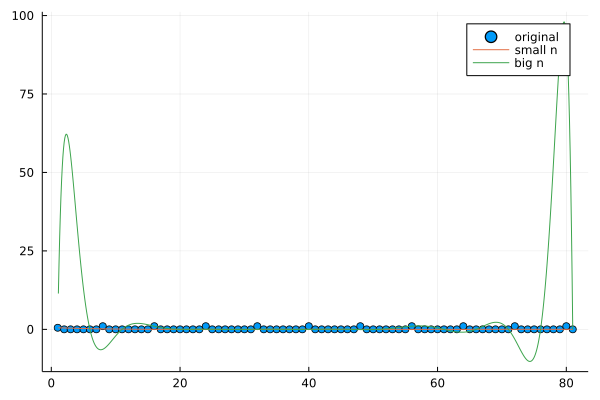

In [29]:
#zadanie 6
using Plots
using Random
using Interpolations
using Polynomials

#=
xs = 1:10
ys = [MathConstants.e^(x/5) for x in 1:10]

interpolated_ys_lagrange = [f(xs, ys, x) for x in interpolated_xs]
scatter(xs, ys, label = "original")

itp_cfree = interpolate(ys, BSpline(Cubic(Free(OnGrid()))))
interpolated_ys_cfree = [itp_cfree(x) for x in interpolated_xs]
itp_cflat = interpolate(ys, BSpline(Cubic(Flat(OnGrid()))))
interpolated_ys_cflat = [itp_cflat(x) for x in interpolated_xs]
#itp_cnat = interpolate(ys, BSpline(Cubic(Natural(OnGrid()))))
#interpolated_ys_cnat = [itp_cnat(x) for x in interpolated_xs]
plot!([interpolated_xs interpolated_xs interpolated_xs], [interpolated_ys_lagrange interpolated_ys_cfree interpolated_ys_cflat], label = ["polynomial" "cubic free" "cubic flat"], legend = :topleft)
=#
#=
xs = 1:10
ys = [sin(x) for x in 1:10]

interpolated_xs = [1 + 0.01*i for i in 1:900]

interpolated_ys_lagrange = [f(xs, ys, x) for x in interpolated_xs]
scatter(xs, ys, label = "original")
itp_cfree = interpolate(ys, BSpline(Cubic(Free(OnGrid()))))
interpolated_ys_cfree = [itp_cfree(x) for x in interpolated_xs]
itp_cflat = interpolate(ys, BSpline(Cubic(Flat(OnGrid()))))
interpolated_ys_cflat = [itp_cflat(x) for x in interpolated_xs]
plot!([interpolated_xs interpolated_xs interpolated_xs], [interpolated_ys_lagrange interpolated_ys_cfree interpolated_ys_cflat], label = ["polynomial" "cubic free" "cubic flat"], legend = :top)
=#

xs = 1:5:81
ys = [1/(1+x^25) for x in xs]
interpolated_xs = [1 + 0.1*i for i in 1:800]
interpolated_ys_N = [neville(xs, ys, x) for x in interpolated_xs]
xs = 1:16:81
ys = [1/(1+x^25) for x in xs]
interpolated_ys_n = [neville(xs, ys, x) for x in interpolated_xs]
scatter(1:81, [1/(1+x^25) for x in 1:81], label = "original")
plot!([interpolated_xs interpolated_xs], [interpolated_ys_n interpolated_ys_N], label = ["small n" "big n"])
